Anel Amanbekova, SE2011 - Linear Regression

In [118]:
%matplotlib inline
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from sklearn import linear_model

In [119]:
# read csv file with Pokemons
df = pd.read_csv("Magnum.csv")
# get first 10 record from dataset
df.head(15)

,Товар,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь
0,"ПИВО ZATECKY GUS 4,4% 0,45Л Ж/Б",420,428,429,439,445,455,461,471
1,"ПИВО БАЛТИКА #7 5,4% 0,45Л Ж/Б",370,374,377,378,379,381,385,394
2,"ПИВО DERBES КРЕПКОЕ 4,5% 0,45Л Ж/Б",385,389,393,395,396,399,401,407
3,"ПИВО БАЛТИКА #9 КРЕПКОЕ СВЕТЛОЕ 8,0% 0,45Л Ж/Б",450,453,454,454,458,462,466,469
4,НАПИТОК COCA COLA 2Л П/Б,500,508,517,522,527,529,531,531
5,"ПИВО ЖИГУЛЕВСКОЕ ФИРМЕННОЕ ЖИВОЕ 4,6% 0,45Л Ж/Б",390,394,394,395,401,406,409,410
6,НАПИТОК COCA COLA 4ШТ*1Л ГР/УП,790,793,802,806,808,809,809,814
7,"НАПИТОК COCA COLA 1,5Л П/Б",385,393,399,408,412,414,418,424
8,НАПИТОК COCA COLA 1Л П/Б,270,277,278,280,281,290,297,297
9,МАСЛО АМЗ ШЕДЕВР 5Л,900,901,906,910,911,917,917,920


In [120]:
# split the data, so X is the prices only
X = df.iloc[:, 1:]
X

,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь
0,420,428,429,439,445,455,461,471
1,370,374,377,378,379,381,385,394
2,385,389,393,395,396,399,401,407
3,450,453,454,454,458,462,466,469
4,500,508,517,522,527,529,531,531
...,...,...,...,...,...,...,...,...
95,270,270,276,283,291,292,294,295
96,900,901,907,909,917,921,923,927
97,660,669,670,676,678,680,686,692
98,210,217,219,227,233,242,252,260


In [121]:
# calculate the actual price of products in November 
df["November"] = df["Октябрь"] + df["Октябрь"] - df[['Август', 'Сентябрь', 'Октябрь']].mean(axis=1)

In [122]:
# split the data, so y is the actual price of November
y = df.iloc[:,9]
y

0     479.666667
1     401.333333
2     411.666667
3     472.333333
4     531.666667
         ...    
95    296.333333
96    930.333333
97    698.000000
98    268.666667
99    382.000000
Name: November, Length: 100, dtype: float64

C:\Users\aneln\AppData\Local\Temp\ipykernel_65780\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

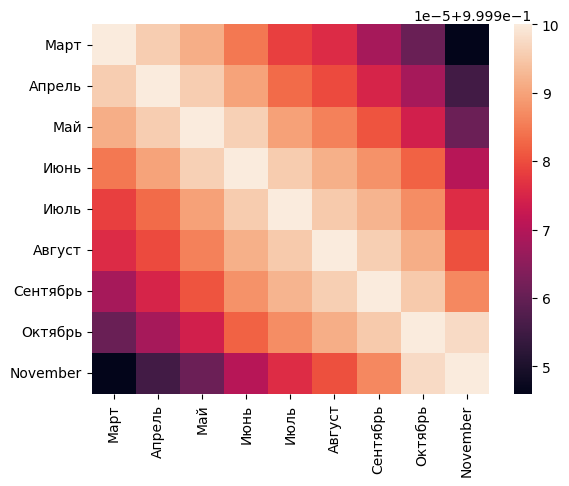

In [123]:
# draw a heatmap to visualize the data
# correlation matrix
sns.heatmap(df.corr())

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
# split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.3)

In [126]:
# fit our set into Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [127]:
# calculating and printing Coefficients
# the values that multiply the predictor values
print(regressor.coef_)

[ 2.29121287e-14 -2.56461519e-14  1.74443793e-14 -2.49661403e-14
  4.41313652e-15 -3.33333333e-01 -3.33333333e-01  1.66666667e+00]


In [128]:
# calculating and printing Intercept
print(regressor.intercept_)

-2.5011104298755527e-12


In [129]:
# predict the values of prices in November
y_pred = regressor.predict(X_test)
y_pred

array([ 168.66666667, 2634.33333333,  411.66666667,  459.        ,
       2351.66666667, 1457.66666667,  299.66666667,  230.33333333,
        543.66666667,  296.33333333, 2831.        ,  886.33333333,
       3778.33333333,  637.66666667,  429.33333333,  718.66666667,
        188.66666667, 1665.        ,  532.33333333,  299.33333333,
       1833.66666667,  217.66666667,  472.33333333, 3539.33333333,
       1015.33333333, 2841.66666667,  817.33333333,  382.        ,
       2343.66666667, 1857.        ])

In [130]:
# calculating the score of Linear Regression
# 1.0 is the good score
regressor.score(X_train,y_train)

1.0

In [131]:
from sklearn.metrics import r2_score
# calculating the r2_score
r2_score(y_test, y_pred)

1.0

In [132]:
df.head(10)

,Товар,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,November
0,"ПИВО ZATECKY GUS 4,4% 0,45Л Ж/Б",420,428,429,439,445,455,461,471,479.666667
1,"ПИВО БАЛТИКА #7 5,4% 0,45Л Ж/Б",370,374,377,378,379,381,385,394,401.333333
2,"ПИВО DERBES КРЕПКОЕ 4,5% 0,45Л Ж/Б",385,389,393,395,396,399,401,407,411.666667
3,"ПИВО БАЛТИКА #9 КРЕПКОЕ СВЕТЛОЕ 8,0% 0,45Л Ж/Б",450,453,454,454,458,462,466,469,472.333333
4,НАПИТОК COCA COLA 2Л П/Б,500,508,517,522,527,529,531,531,531.666667
5,"ПИВО ЖИГУЛЕВСКОЕ ФИРМЕННОЕ ЖИВОЕ 4,6% 0,45Л Ж/Б",390,394,394,395,401,406,409,410,411.666667
6,НАПИТОК COCA COLA 4ШТ*1Л ГР/УП,790,793,802,806,808,809,809,814,817.333333
7,"НАПИТОК COCA COLA 1,5Л П/Б",385,393,399,408,412,414,418,424,429.333333
8,НАПИТОК COCA COLA 1Л П/Б,270,277,278,280,281,290,297,297,299.333333
9,МАСЛО АМЗ ШЕДЕВР 5Л,900,901,906,910,911,917,917,920,922.000000


In [133]:
import statsmodels.api as sm
# calculate the residual value
reg = sm.OLS(X,y).fit()
reg.resid

,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь
0,-50.035119,-43.354735,-43.566121,-34.746204,-29.950350,-21.104761,-16.274548,-7.475862
1,-23.274693,-20.378806,-18.392362,-18.379729,-18.387228,-17.353115,-14.331866,-6.336996
2,-18.400537,-15.533077,-12.572730,-11.585519,-11.618959,-9.609715,-8.613667,-3.644676
3,-12.849037,-11.148478,-11.341343,-12.503385,-9.689122,-6.825884,-3.977786,-2.160734
4,-20.990977,-14.453650,-6.796360,-3.104375,0.560939,1.281380,1.984778,0.653232
...,...,...,...,...,...,...,...,...
95,-20.383059,-21.198304,-15.946686,-9.675730,-2.419639,-2.132823,-0.855506,-0.597666
96,-11.652549,-13.211999,-9.561531,-9.850351,-4.185842,-2.424871,-2.693720,-1.023718
97,-23.984392,-16.904667,-17.667447,-13.384678,-13.136923,-12.816796,-8.519043,-4.267168
98,-53.271929,-47.011061,-45.689571,-38.350549,-33.025005,-24.671604,-15.326814,-7.999684


In [134]:
# compare actual and predicted prices
base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = regressor.predict(X_test)
base

,actual,predictions
26,168.666667,168.666667
86,2634.333333,2634.333333
2,411.666667,411.666667
55,459.000000,459.000000
75,2351.666667,2351.666667
93,1457.666667,1457.666667
16,299.666667,299.666667
73,230.333333,230.333333
54,543.666667,543.666667
95,296.333333,296.333333


In [138]:
from sklearn import metrics
# some more additional analysis of errors
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

Mean Absolute Error:  1.811410281031082e-12
Mean Squared Error:  4.155613225798628e-24
Root Mean Squared Error:  1.3458864294698427e-06
